In [29]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [31]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [32]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [33]:
# Load ranked analysis

ranked_df = pd.read_csv('./ranked_analysis_scopes.csv', sep=',')
ranked_df

,scope,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [34]:
# Use shorter names for columns

ranked_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000


In [35]:
# Add search term info to ranked analysis data

ranked_df = ranked_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,broad,GSE109048,0.000000,0.000000,0.000000,0.000000,3.600,6.000000,0.000000,0.000000,0.000000,0.0,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
1,broad,GSE118226,0.000000,0.000000,0.000000,0.000000,0.000,1.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
2,broad,GSE121592,0.000000,0.000000,0.000000,3.142857,5.500,3.666667,0.000000,0.000000,2.444444,5.5,4.400000,0.000000,0.000000,0.000000,3.666667,5.500000,t-cell function
3,broad,GSE121747,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.0,2.100000,0.000000,0.000000,0.000000,0.000000,2.333333,t-cell function
4,broad,GSE123487,0.000000,2.111111,6.333333,6.333333,4.750,3.800000,0.000000,2.714286,3.166667,3.8,2.714286,0.000000,0.000000,0.000000,0.000000,0.000000,myocardial infarction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,very specific,S-EPMC6166283,3.166667,3.800000,3.166667,2.714286,1.900,0.000000,3.166667,3.166667,2.714286,1.9,0.000000,3.166667,3.166667,2.111111,1.900000,0.000000,sublingual immunotherapy
477,very specific,S-EPMC6952273,2.750000,2.750000,2.750000,5.500000,5.500,3.666667,2.750000,2.750000,3.666667,5.5,3.666667,2.750000,2.750000,2.750000,5.500000,3.666667,addison's disease
478,very specific,S-EPMC7182094,1.444444,1.444444,1.444444,1.300000,1.300,1.300000,1.444444,1.300000,1.300000,1.3,1.300000,1.444444,1.300000,1.300000,1.300000,1.300000,addison's disease
479,very specific,VIVLI_4561de30-5510-4875-9ef6-1327d249bf57,2.333333,2.333333,5.250000,5.250000,5.250,5.250000,2.625000,5.250000,5.250000,10.5,7.000000,3.000000,5.250000,10.500000,21.000000,21.000000,sublingual immunotherapy


In [36]:
duplicate_results = ranked_df[ranked_df.duplicated(['result id'])]
duplicate_results

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term


In [37]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [38]:
def compute_scores(df, combination_order):
    final_df = pd.DataFrame()

    for combi in combination_order:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combination_order
    return final_df

In [39]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [40]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [41]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [42]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [57]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

# somewhat specific

In [44]:
somewhat_specific_ranked_df = ranked_df.loc[ranked_df['scope'] == 'somewhat specific']
somewhat_specific_ranked_df

,scope,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
120,somewhat specific,Dataverse_10.7910_DVN_QTZ9UM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,tuberculin skin test
121,somewhat specific,E-GEOD-10147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.875000,0.000000,0.000000,0.000000,plasmacytoid dendritic cells
122,somewhat specific,E-GEOD-24785,6.666667,6.666667,6.666667,2.500000,0.000000,0.000000,10.000000,6.666667,3.333333,0.000000,0.000000,10.000000,6.666667,5.000000,2.500000,0.000000,plasmacytoid dendritic cells
123,somewhat specific,E-MTAB-6815,0.000000,2.000000,2.000000,2.000000,2.222222,2.000000,2.000000,2.000000,2.000000,2.222222,2.222222,2.000000,2.000000,2.000000,2.000000,0.000000,tuberculin skin test
124,somewhat specific,GSE114313,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,plasmacytoid dendritic cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,somewhat specific,S-EPMC6878640,2.666667,2.666667,2.666667,2.666667,3.200000,2.666667,2.666667,2.666667,2.666667,2.285714,2.666667,2.666667,2.666667,2.285714,2.285714,2.000000,allergen skin prick test
206,somewhat specific,S-EPMC6906969,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.750000,2.000000,2.000000,2.000000,1.750000,1.750000,1.555556,allergen skin prick test
207,somewhat specific,ZENODO_4967664,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,7.500000,5.000000,3.000000,3.000000,7.500000,7.500000,5.000000,allergen skin prick test
208,somewhat specific,ZENODO_5008681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,zika microcephaly


In [45]:
# Calculate scores per search term per combination

somewhat_specific_scores_df = compute_scores(somewhat_specific_ranked_df, combination_order)
somewhat_specific_scores_df

,search term,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,allergen skin prick test,41.686111,41.722222,41.722222,40.866667,40.844444,41.322222,41.722222,41.722222,40.852778,41.296825,41.144444,41.700000,41.722222,41.746825,41.546825,41.122222
1,immunotherapeutics,57.660317,57.660317,57.760317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.831746
2,plasmacytoid dendritic cells,60.199603,62.363889,61.769048,61.538889,62.898810,63.688492,61.563889,61.757937,62.349603,62.683333,63.639286,61.563889,61.826587,61.885714,61.738889,63.074206
3,rational cancer drug design,51.593254,51.593254,51.843254,52.043254,51.976587,50.115873,51.593254,51.843254,52.043254,52.122619,50.865873,51.593254,51.593254,51.843254,52.043254,51.839683
4,tuberculin skin test,55.576984,57.576984,58.076984,57.835317,57.826984,58.251984,57.576984,58.112698,58.019841,58.110317,58.076984,57.612698,57.865079,58.165079,57.965873,57.076984
5,zika microcephaly,45.925397,45.925397,46.130952,46.716667,48.536905,49.737302,45.925397,46.030952,46.395238,48.108333,49.941270,45.825397,46.030952,46.161905,47.425000,49.249603


In [46]:
# Run Wilcoxon test

somewhat_specific_wilcoxon_df = perform_wilcoxon_test(somewhat_specific_scores_df)
somewhat_specific_wilcoxon_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,set 1,set 2,statistic,p-value
0,original,c1,0.0,0.108809
1,original,c2,0.0,0.031250
2,original,c3,4.0,0.218750
3,original,c4,3.0,0.156250
4,original,c5,5.0,0.312500
...,...,...,...,...
115,c12,c14,5.0,0.312500
116,c12,c15,7.0,0.562500
117,c13,c14,6.5,0.786457
118,c13,c15,8.0,0.687500


In [47]:
# Export scores per search term

somewhat_specific_scores_df.to_csv('../alternate_test/results/scores_somewhat_specific.csv', index = False)

In [48]:
# Drop search term column

somewhat_specific_scores_only_df = somewhat_specific_scores_df.drop(columns = ['search term'])
somewhat_specific_scores_only_df

,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,41.686111,41.722222,41.722222,40.866667,40.844444,41.322222,41.722222,41.722222,40.852778,41.296825,41.144444,41.700000,41.722222,41.746825,41.546825,41.122222
1,57.660317,57.660317,57.760317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.760317,57.660317,57.660317,57.760317,57.760317,57.831746
2,60.199603,62.363889,61.769048,61.538889,62.898810,63.688492,61.563889,61.757937,62.349603,62.683333,63.639286,61.563889,61.826587,61.885714,61.738889,63.074206
3,51.593254,51.593254,51.843254,52.043254,51.976587,50.115873,51.593254,51.843254,52.043254,52.122619,50.865873,51.593254,51.593254,51.843254,52.043254,51.839683
4,55.576984,57.576984,58.076984,57.835317,57.826984,58.251984,57.576984,58.112698,58.019841,58.110317,58.076984,57.612698,57.865079,58.165079,57.965873,57.076984
5,45.925397,45.925397,46.130952,46.716667,48.536905,49.737302,45.925397,46.030952,46.395238,48.108333,49.941270,45.825397,46.030952,46.161905,47.425000,49.249603


In [49]:
# Compute total scores per combination

somewhat_specific_total_scores_df = somewhat_specific_scores_only_df.sum()
somewhat_specific_total_scores_df

original    312.641667
c1          316.842063
c2          317.302778
c3          316.761111
c4          319.844048
c5          320.876190
c6          316.042063
c7          317.127381
c8          317.421032
c9          320.081746
c10         321.428175
c11         315.955556
c12         316.698413
c13         317.563095
c14         318.480159
c15         320.194444
dtype: float64

In [50]:
# Determine winners by comparing combination scores

winners = compare_scores(somewhat_specific_total_scores_df, combination_order)
winners

{('original', 'c1'): 'c1',
 ('original', 'c2'): 'c2',
 ('original', 'c3'): 'c3',
 ('original', 'c4'): 'c4',
 ('original', 'c5'): 'c5',
 ('original', 'c6'): 'c6',
 ('original', 'c7'): 'c7',
 ('original', 'c8'): 'c8',
 ('original', 'c9'): 'c9',
 ('original', 'c10'): 'c10',
 ('original', 'c11'): 'c11',
 ('original', 'c12'): 'c12',
 ('original', 'c13'): 'c13',
 ('original', 'c14'): 'c14',
 ('original', 'c15'): 'c15',
 ('c1', 'c2'): 'c2',
 ('c1', 'c3'): 'c1',
 ('c1', 'c4'): 'c4',
 ('c1', 'c5'): 'c5',
 ('c1', 'c6'): 'c1',
 ('c1', 'c7'): 'c7',
 ('c1', 'c8'): 'c8',
 ('c1', 'c9'): 'c9',
 ('c1', 'c10'): 'c10',
 ('c1', 'c11'): 'c1',
 ('c1', 'c12'): 'c1',
 ('c1', 'c13'): 'c13',
 ('c1', 'c14'): 'c14',
 ('c1', 'c15'): 'c15',
 ('c2', 'c3'): 'c2',
 ('c2', 'c4'): 'c4',
 ('c2', 'c5'): 'c5',
 ('c2', 'c6'): 'c2',
 ('c2', 'c7'): 'c2',
 ('c2', 'c8'): 'c8',
 ('c2', 'c9'): 'c9',
 ('c2', 'c10'): 'c10',
 ('c2', 'c11'): 'c2',
 ('c2', 'c12'): 'c2',
 ('c2', 'c13'): 'c13',
 ('c2', 'c14'): 'c14',
 ('c2', 'c15'): 'c1

In [51]:
# Add winners to Wilcoxon test results

somewhat_specific_wilcoxon_df['winner'] = somewhat_specific_wilcoxon_df.apply(add_winner, axis = 1)
somewhat_specific_wilcoxon_df

,set 1,set 2,statistic,p-value,winner
0,original,c1,0.0,0.108809,c1
1,original,c2,0.0,0.031250,c2
2,original,c3,4.0,0.218750,c3
3,original,c4,3.0,0.156250,c4
4,original,c5,5.0,0.312500,c5
...,...,...,...,...,...
115,c12,c14,5.0,0.312500,c14
116,c12,c15,7.0,0.562500,c15
117,c13,c14,6.5,0.786457,c14
118,c13,c15,8.0,0.687500,c15


In [52]:
somewhat_specific_wilcoxon_df['winner'].value_counts()

c10    15
c5     14
c15    13
c9     12
c4     11
c14    10
c13     9
c8      8
c2      7
c7      6
c1      5
c3      4
c12     3
c6      2
c11     1
Name: winner, dtype: int64

In [53]:
somewhat_specific_wilcoxon_df[somewhat_specific_wilcoxon_df['p-value'] <= 0.05]

,set 1,set 2,statistic,p-value,winner
1,original,c2,0.0,0.031250,c2
6,original,c7,0.0,0.043114,c7
12,original,c13,0.0,0.031250,c13
32,c2,c6,0.0,0.043114,c2
37,c2,c11,0.0,0.031250,c2
47,c3,c9,0.0,0.043114,c9
81,c6,c13,0.0,0.031250,c13
87,c7,c11,0.0,0.043114,c7
89,c7,c13,0.0,0.043114,c13
92,c8,c9,0.0,0.043114,c9


In [54]:
# Export Wilcoxon test results

somewhat_specific_wilcoxon_df.to_csv('../alternate_test/results/wilcoxon_with_winners_somewhat_specific.csv', index = False)

In [55]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

somewhat_specific_wilcoxon_df[['set 1', 'set 2', 'p-value']] = somewhat_specific_wilcoxon_df.apply(swap_sets, axis = 1)

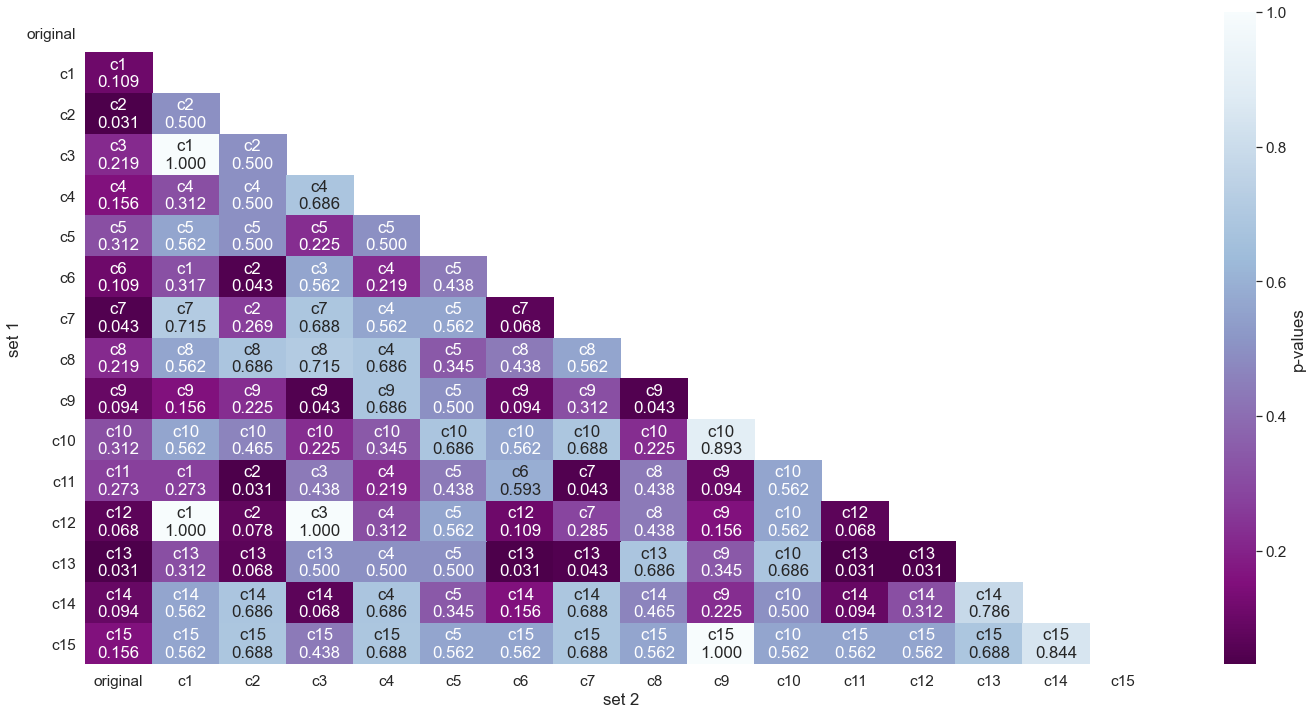

In [58]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(somewhat_specific_wilcoxon_df, 'Heatmap of p-values | Wilcoxon test', 
                            'wilcoxon_heatmap_with_winners_somewhat_specific')